In [ ]:
!mkdir coco
!cd coco
!mkdir images
!cd images

# !wget http://images.cocodataset.org/zips/train2017.zip
!wget http://images.cocodataset.org/zips/val2017.zip
# !wget http://images.cocodataset.org/zips/test2017.zip
# !wget http://images.cocodataset.org/zips/unlabeled2017.zip

# !unzip train2017.zip
!unzip val2017.zip
# !unzip test2017.zip
# !unzip unlabeled2017.zip

# !rm train2017.zip
!rm val2017.zip
# !rm test2017.zip
# !rm unlabeled2017.zip 

!cd ../
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip
# !wget http://images.cocodataset.org/annotations/stuff_annotations_trainval2017.zip
# !wget http://images.cocodataset.org/annotations/image_info_test2017.zip
# !wget http://images.cocodataset.org/annotations/image_info_unlabeled2017.zip

!unzip annotations_trainval2017.zip
# !unzip stuff_annotations_trainval2017.zip
# !unzip image_info_test2017.zip
# !unzip image_info_unlabeled2017.zip

!rm annotations_trainval2017.zip
# !rm stuff_annotations_trainval2017.zip
# !rm image_info_test2017.zip
# !rm image_info_unlabeled2017.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 extracting: val2017/000000577584.jpg  
 extracting: val2017/000000346905.jpg  
 extracting: val2017/000000433980.jpg  
 extracting: val2017/000000228144.jpg  
 extracting: val2017/000000041872.jpg  
 extracting: val2017/000000117492.jpg  
 extracting: val2017/000000368900.jpg  
 extracting: val2017/000000376900.jpg  
 extracting: val2017/000000352491.jpg  
 extracting: val2017/000000330790.jpg  
 extracting: val2017/000000384850.jpg  
 extracting: val2017/000000032735.jpg  
 extracting: val2017/000000197004.jpg  
 extracting: val2017/000000526751.jpg  
 extracting: val2017/000000041488.jpg  
 extracting: val2017/000000153632.jpg  
 extracting: val2017/000000501523.jpg  
 extracting: val2017/000000405691.jpg  
 extracting: val2017/000000040757.jpg  
 extracting: val2017/000000219485.jpg  
 extracting: val2017/000000428280.jpg  
 extracting: val2017/000000209222.jpg  
 extracting: val2017/000000353051.jpg  
 extracting: val2017/000000191471.jpg  
 ext

In [ ]:
import os.path as osp
import json
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from PIL import Image 

In [ ]:
def make_datapath_list(rootpath):
    json_path = osp.join(rootpath, 'person_keypoints_val2017.json')
    with open(json_path) as data_file:
        data_this = json.load(data_file)
        data_json = data_this['images']
        anno_json = data_this['annotations']
    
    num_samples = len(data_json)
    train_name_list = []
    val_name_list = []
    anno_list = []

    for data in data_json[:int(num_samples*0.8)]:
        train_name_list.append(data['file_name'])


    for data in data_json[int(num_samples*0.8):]:
        val_name_list.append(data['file_name'])

    for data in anno_json:
        anno_list.append((data['image_id'],data['keypoints']))
    anno_list.sort(key=lambda x: x[0])
    
    
    return train_name_list, val_name_list, anno_list


train_list, val_list, anno_list = make_datapath_list('/content/annotations/')
print(len(train_list))
print(val_list[:5])
print(anno_list[:2])

4000
['000000128112.jpg', '000000096825.jpg', '000000562229.jpg', '000000157365.jpg', '000000015254.jpg']
[(139, [427, 170, 1, 429, 169, 2, 0, 0, 0, 434, 168, 2, 0, 0, 0, 441, 177, 2, 446, 177, 2, 437, 200, 2, 430, 206, 2, 430, 220, 2, 420, 215, 2, 445, 226, 2, 452, 223, 2, 447, 260, 2, 454, 257, 2, 455, 290, 2, 459, 286, 2]), (139, [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])]


In [ ]:
train = pd.DataFrame(train_list)
anno = pd.DataFrame(anno_list)
# anno[anno[0]==train[:][6:12]]
anno

,0,1
0,139,"[427, 170, 1, 429, 169, 2, 0, 0, 0, 434, 168, ..."
1,139,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,785,"[367, 81, 2, 374, 73, 2, 360, 75, 2, 386, 78, ..."
3,872,"[367, 138, 2, 0, 0, 0, 360, 134, 2, 0, 0, 0, 3..."
4,872,"[211, 187, 1, 215, 179, 2, 0, 0, 0, 241, 175, ..."
...,...,...
10999,581357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11000,581357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11001,581357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11002,581357,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


872
000000157365.jpg


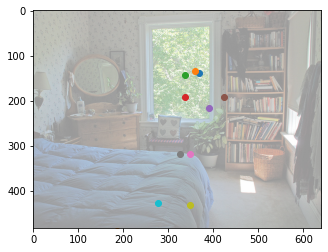

In [ ]:
import random
index = random.choice(range(len(val_list)))
index = 3
# img = Image.open('./val2017/'+val_list[index])
img = Image.open('./val2017/'+'000000000632.jpg')
l = len(anno_list[index][1])
for i in range(0,l,3):
    x, y, k = anno_list[index][1][i:i+3]
    if x != 0:
        # print(x)
        # print(y)
        plt.scatter(x,y)
# print(anno_list[index][1])

# plt.show()
print(anno_list[index][0])
print(val_list[index])
plt.imshow(img, alpha = 0.4)
plt.show()

In [ ]:
json_path = osp.join('/content/annotations/person_keypoints_train2017.json')
with open(json_path) as data_file:
    data_this = json.load(data_file)

In [ ]:
data_this.keys()

dict_keys(['info', 'licenses', 'images', 'annotations', 'categories'])

In [ ]:
# data_this['images'][0]['file_name']
d_t=pd.DataFrame(data_this['annotations'])
# d_t.keys()

In [ ]:
d_t

,segmentation,num_keypoints,area,iscrowd,keypoints,image_id,bbox,category_id,id
0,"[[267.03, 243.78, 314.59, 154.05, 357.84, 136....",8,28292.08625,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",537548,"[267.03, 104.32, 229.19, 320]",1,183020
1,"[[640, 408.25, 639.54, 4.33, 546.25, 5.29, 426...",2,39122.63310,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",117891,"[206.77, 1.44, 433.23, 408.73]",1,183030
2,"[[332.57, 119.02, 327.1, 82.24, 330.75, 41.08,...",4,5634.56940,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",120021,"[276.12, 0.29, 61.18, 118.73]",1,183050
3,"[[364.84, 129.8, 363.74, 127.18, 363.52, 124.7...",0,672.72905,0,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",403255,"[355.87, 118.43, 30.84, 42.87]",1,183057
4,"[[187.03, 472.97, 192.43, 350.81, 181.62, 335....",13,26215.66095,0,"[0, 0, 0, 0, 0, 0, 252, 156, 2, 0, 0, 0, 248, ...",209468,"[178.38, 120.54, 114.59, 354.6]",1,183062
...,...,...,...,...,...,...,...,...,...
262460,"{'counts': [4138, 7, 418, 12, 413, 14, 1, 2, 1...",0,23580.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",128732,"[9, 284, 560, 141]",1,900100128732
262461,"{'counts': [111472, 7, 365, 11, 362, 13, 360, ...",0,25439.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",489186,"[298, 0, 341, 127]",1,900100489186
262462,"{'counts': [13254, 1, 316, 4, 6, 1, 315, 7, 31...",0,4227.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",390883,"[40, 104, 394, 43]",1,900100390883
262463,"{'counts': [99015, 6, 352, 8, 350, 9, 322, 11,...",0,6478.00000,1,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",554743,"[275, 207, 153, 148]",1,900100554743


In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

In [ ]:
dataDir='./'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)
coco=COCO(annFile)
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [ ]:
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [ ]:
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()